In [1]:
# Fine tuning classifiers - Example using Titanic dataset

In [2]:
# import common libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
# Load data and prepare dataset
titan = pd.read_csv("titanic.csv")
titan = titan.dropna()

titan = titan.drop(["Name"], axis = 1)

# preparing the dependent and independent variables
# Dummy coding using pd.get_dummies() and checking dtypes of coded variables

titan = pd.get_dummies(titan, drop_first = True, dtype = int)

# make y (dependent variable) as np.array
y = np.array(titan["Survival_Survived"])

# make x a dataframe subset with independent variables
X = titan[["Age", "Gender_Male", "Class_2nd", "Class_3rd", "Fare"]]

# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Decision tree with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf_gini.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = clf_gini.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.7197452229299363

Confusion Matrix:
 [[142  33]
 [ 55  84]]


In [5]:
# Random Forest
# import Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=10)

# Train the model
clf.fit(X_train, y_train)

# Model predictions
y_pred_rf = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.7707006369426752

Confusion Matrix:
 [[148  27]
 [ 45  94]]


In [6]:
# SVM with Titanic dataset
# import SVC from sklearn
from sklearn.svm import SVC

# Initialize SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Predict the responses for the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.732484076433121

Confusion Matrix:
 [[141  34]
 [ 50  89]]


Start search time: 2024-02-08 16:52:11.254808
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}
Best estimator: RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=300,
                       random_state=10)
Feature importance: [0.18602099 0.47984834 0.02101462 0.10508456 0.20803149]
End search time: 2024-02-08 16:53:04.893734

Accuracy: 0.7707006369426752


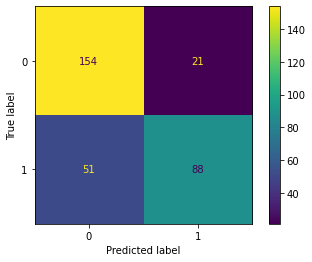

In [8]:
# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters 
# Define the parameter grid
param = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [4, 6, 8],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=RF, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

# confusion matrix 

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Start search time: 2024-02-08 16:56:56.249220
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best estimator: SVC(C=0.1, gamma=0.1, kernel='linear')
End search time: 2024-02-08 17:27:56.145941

Accuracy: 0.732484076433121


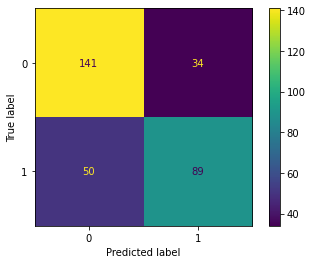

In [9]:
# SVM - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# SVM -- Tunning parameters 
param = {
    'C':[0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1 ], # 1/n_features
    'kernel': ['rbf', 'linear'] 
}

SVM = SVC()

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=SVM, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

# end grid search
print("End search time:", datetime.now())

# confusion matrix 

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures 


In [ ]:
# RF ROC Curve & Area Under Curve 
# roc and auc -- decision tree 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predic_prob =final_model_rf.predict_proba(X_test) # Probability estimates [0,1]
rf_auc = roc_auc_score(y_test, predic_prob[:,1])
print("ROC Area Under Curve:", rf_auc)

# visualization of roc 
rf_fpr, rf_tpr, threshold =roc_curve(y_test, predic_prob[:,1])

plt.plot(rf_fpr,rf_tpr,marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()